## Import Libraries & Load Dataset

In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

## Amazon Dataset

In [2]:
data = pd.read_csv("Amazon.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [3]:
data["Date"] = pd.to_datetime(data["Date"])
data = data[["Date","Close"]]
data.head()

,Date,Close
0,1997-05-15,1.958333
1,1997-05-16,1.729167
2,1997-05-19,1.708333
3,1997-05-20,1.635417
4,1997-05-21,1.427083


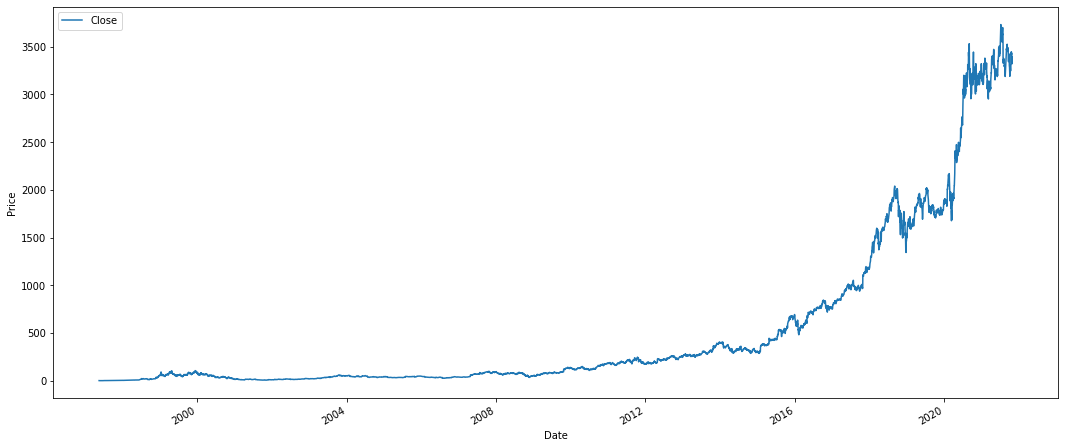

In [4]:
data.set_index("Date").plot(figsize=(18,8),xlabel="Date",ylabel="Price")

In [5]:
data.rename(columns={"Date":"ds","Close":"y"},inplace=True)

# Model
## fbprophet

In [6]:
prophet = Prophet()
prophet.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = prophet.make_future_dataframe(periods=730)
forecast = prophet.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6880,2023-10-23,4497.368759,4325.969564,4672.856116,4432.455015,4570.116059,-2.234984,-2.234984,-2.234984,-3.155322,-3.155322,-3.155322,0.920337,0.920337,0.920337,0.0,0.0,0.0,4495.133774
6881,2023-10-24,4498.892288,4313.047228,4671.953913,4433.958638,4571.809137,-0.941949,-0.941949,-0.941949,-1.246295,-1.246295,-1.246295,0.304346,0.304346,0.304346,0.0,0.0,0.0,4497.950339
6882,2023-10-25,4500.415818,4314.767590,4686.974774,4435.462261,4573.612997,-0.969629,-0.969629,-0.969629,-0.609837,-0.609837,-0.609837,-0.359792,-0.359792,-0.359792,0.0,0.0,0.0,4499.446189
6883,2023-10-26,4501.939348,4331.096385,4664.555872,4436.965884,4575.416858,-2.194070,-2.194070,-2.194070,-1.130704,-1.130704,-1.130704,-1.063367,-1.063367,-1.063367,0.0,0.0,0.0,4499.745278
6884,2023-10-27,4503.462878,4318.963998,4668.738261,4438.469507,4577.220718,-5.137674,-5.137674,-5.137674,-3.340828,-3.340828,-3.340828,-1.796846,-1.796846,-1.796846,0.0,0.0,0.0,4498.325203


Text(0.5, 1.0, 'Amazon price stock forecasting')

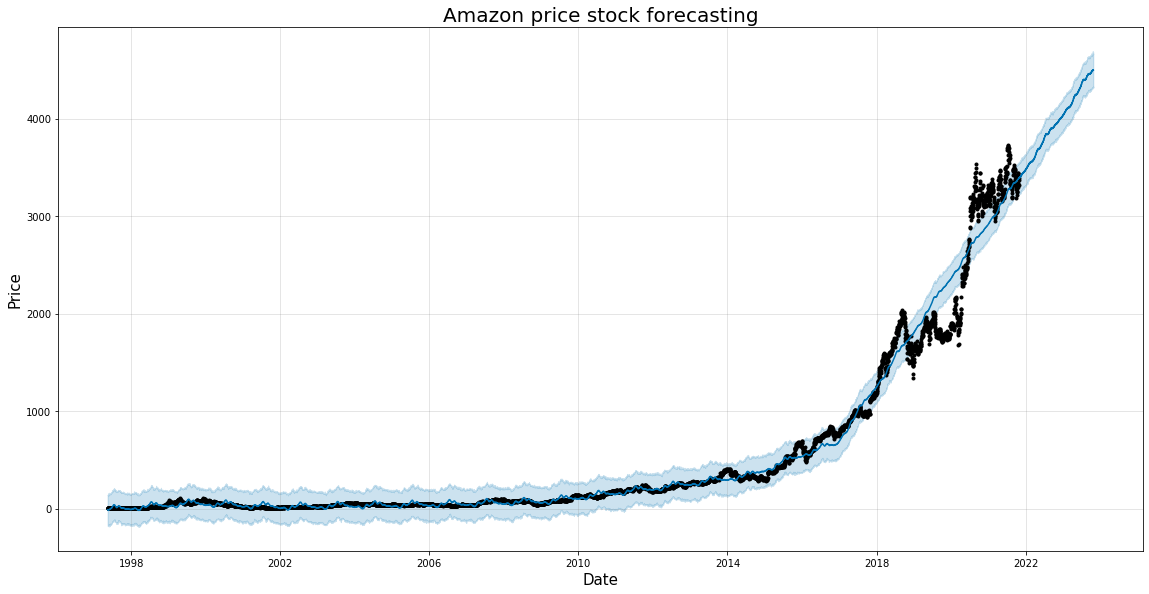

In [8]:
prophet.plot(forecast,figsize=(16,8))
plt.xlabel("Date",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.title("Amazon price stock forecasting",fontsize=20)

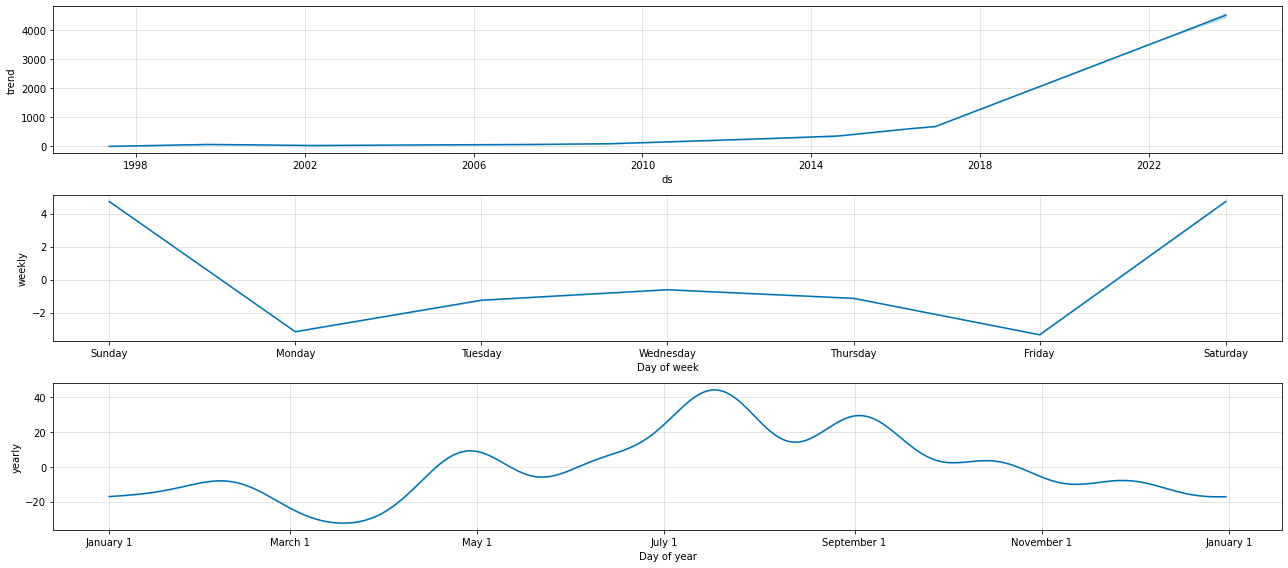

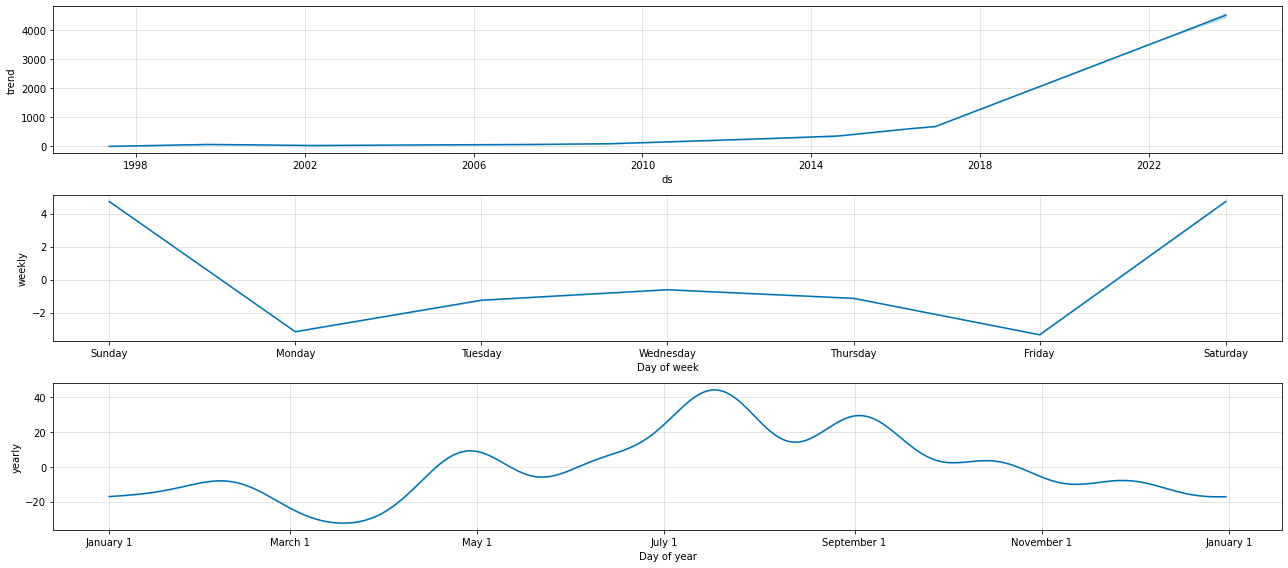

In [9]:
prophet.plot_components(forecast,figsize=(18,8))